In [123]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Reading data 

In [226]:
df = pd.read_csv('tom_project_metrics 1.csv')

In [227]:
df.head(10)

,repo_fullname,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,...,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day
0,nuvention-web/Team-I,290.0,1918.0,1630.0,177023.0,87729.0,610.0,303.0,8.0,101.0,...,0,0,0,0,0.000000,0.000000,0.0,0,0,0
1,cezuni/sys-sw-playground,215.0,1584.0,1211.0,1463.0,1314.0,7.0,6.0,1.0,19.0,...,0,0,0,0,0.000000,0.000000,0.0,0,0,0
2,Azure-Samples/storage-table-python-getting-sta...,10.0,2073.0,1609.0,771.0,102.0,77.0,10.0,3.0,78.0,...,13,1,1,0,0.000000,0.000000,0.0,0,0,0
3,andela/bp-esa-frontend,269.0,1372.0,946.0,875789.0,871496.0,3256.0,3240.0,8.0,115.0,...,0,0,0,0,0.000000,0.000000,0.0,0,0,0
4,microsoft/AMBROSIA,1225.0,1224.0,22.0,1676395.0,1457341.0,1368.0,1190.0,7.0,61.0,...,399,2,34,2,0.019242,0.019242,0.0,0,2,0
5,MicrosoftDocs/VBA-Docs,4588.0,19095.0,10.0,17041947.0,9127626.0,3714.0,1989.0,57.0,79.0,...,273,1,3,0,0.000000,0.000000,0.0,0,0,0
6,microsoft/logrl,16.0,910.0,61.0,1990.0,465.0,124.0,29.0,3.0,127.0,...,22,1,2,0,0.000000,0.000000,0.0,0,0,0
7,divya0792/INFO-5100-Project,375.0,883.0,850.0,117818.0,25693.0,314.0,69.0,8.0,37.0,...,1,1,1,0,0.000000,0.000000,0.0,0,0,0
8,popcodeorg/popcode,3827.0,2473.0,301.0,404932.0,286465.0,106.0,75.0,4.0,124.0,...,178,1,4,0,0.000000,0.000000,0.0,0,0,0
9,spacetelescope/diversity_stats,29.0,1418.0,1418.0,2100699.0,2097398.0,72438.0,72324.0,1.0,37.0,...,0,0,0,0,0.000000,0.000000,0.0,0,0,0


# Removing Nan values

In [228]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
repo_fullname=df['repo_fullname']
df = df.drop(['repo_fullname'], axis=1)

In [229]:
df

,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day_real,...,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day
0,290.0,1918.0,1630.0,177023.0,87729.0,610.0,303.0,8.0,101.0,6.0,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
1,215.0,1584.0,1211.0,1463.0,1314.0,7.0,6.0,1.0,19.0,15.0,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
2,10.0,2073.0,1609.0,771.0,102.0,77.0,10.0,3.0,78.0,3.0,...,13,1,1,0,0.000000,0.000000,0.000000,0,0,0
3,269.0,1372.0,946.0,875789.0,871496.0,3256.0,3240.0,8.0,115.0,2.0,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
4,1225.0,1224.0,22.0,1676395.0,1457341.0,1368.0,1190.0,7.0,61.0,3.0,...,399,2,34,2,0.019242,0.019242,0.000000,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,861.0,1277.0,46.0,59121.0,58958.0,69.0,68.0,10.0,40.0,5.0,...,12,1,1,0,0.000000,0.000000,0.000000,0,0,0
531,2656.0,1151.0,2.0,577128.0,366864.0,217.0,138.0,20.0,26.0,5.0,...,3,1,1,0,0.000000,0.000000,0.000000,0,0,0
532,188.0,1850.0,742.0,32922.0,17946.0,175.0,95.0,2.0,57.0,3.0,...,3,1,1,0,0.000000,0.000000,0.000000,0,0,0
533,405.0,2335.0,30.0,38367.0,22954.0,95.0,57.0,4.0,56.0,3.0,...,4,1,1,6,0.088426,0.077307,0.011119,0,2,0


In [230]:
imputer.fit(df)

df = pd.DataFrame(imputer.transform(df), columns=df.columns)



In [231]:
df


,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day_real,...,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day
0,290.0,1918.0,1630.0,177023.0,87729.0,610.0,303.0,8.0,101.0,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,215.0,1584.0,1211.0,1463.0,1314.0,7.0,6.0,1.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,10.0,2073.0,1609.0,771.0,102.0,77.0,10.0,3.0,78.0,3.0,...,13.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,269.0,1372.0,946.0,875789.0,871496.0,3256.0,3240.0,8.0,115.0,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,1225.0,1224.0,22.0,1676395.0,1457341.0,1368.0,1190.0,7.0,61.0,3.0,...,399.0,2.0,34.0,2.0,0.019242,0.019242,0.000000,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,861.0,1277.0,46.0,59121.0,58958.0,69.0,68.0,10.0,40.0,5.0,...,12.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
531,2656.0,1151.0,2.0,577128.0,366864.0,217.0,138.0,20.0,26.0,5.0,...,3.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
532,188.0,1850.0,742.0,32922.0,17946.0,175.0,95.0,2.0,57.0,3.0,...,3.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
533,405.0,2335.0,30.0,38367.0,22954.0,95.0,57.0,4.0,56.0,3.0,...,4.0,1.0,1.0,6.0,0.088426,0.077307,0.011119,0.0,2.0,0.0


# Kolmogrove-Smirnov Test For Normality

In [54]:
for column in df.columns:
    means=[]
    for f in range(39,535,40):
        t=[]
        sample=np.random.choice(df[column],replace=False,size=f)
        sample_mean=np.mean(sample)
        for i in range(450):
            temp_sample=np.random.choice(sample,replace=True,size=f)
            temp_sample_mean=np.mean(temp_sample)
            temp_sample_std=np.std(temp_sample)
            t.append((temp_sample_mean-sample_mean)/(temp_sample_std/(f**0.5)))
        t.sort()
        means.append((round(t[24], 2),round(t[74], 2)))

    print(column)
    for item in means:
        print(item)
    print('+++++++++++++++++++++++++++++++++++++++++')

commits_count
(-3.81, -2.18)
(-2.48, -1.25)
(-2.45, -1.36)
(-2.3, -1.26)
(-2.35, -1.44)
(-2.14, -1.35)
(-2.05, -1.23)
(-1.88, -1.14)
(-2.19, -1.35)
(-2.09, -1.0)
(-1.89, -1.24)
(-2.19, -1.15)
(-1.96, -1.16)
+++++++++++++++++++++++++++++++++++++++++
commits_days_since_first
(-1.8, -1.06)
(-3.48, -2.24)
(-1.7, -0.94)
(-3.02, -1.85)
(-1.83, -1.02)
(-2.81, -1.27)
(-3.16, -1.36)
(-3.25, -1.57)
(-2.65, -1.38)
(-2.29, -1.31)
(-2.41, -1.25)
(-2.19, -1.29)
(-2.05, -1.21)
+++++++++++++++++++++++++++++++++++++++++
commits_days_since_last
(-1.74, -1.05)
(-1.75, -1.04)
(-1.74, -1.13)
(-1.69, -1.05)
(-1.83, -0.98)
(-1.76, -1.0)
(-1.72, -1.05)
(-1.7, -0.96)
(-1.46, -1.02)
(-1.93, -1.17)
(-1.66, -1.03)
(-1.65, -0.91)
(-1.48, -0.83)
+++++++++++++++++++++++++++++++++++++++++
commits_total_lines_added
(-2.51, -1.27)
(-2.1, -1.18)
(-2.18, -1.27)
(-2.09, -1.08)
(-6.98, -4.69)
(-2.46, -1.45)
(-2.89, -1.5)
(-2.11, -1.17)
(-2.11, -1.12)
(-5.13, -3.11)
(-4.19, -2.68)
(-4.58, -2.64)
(-4.18, -2.82)
+++++++++++++

C:\Users\Alaa Aldin Hajjar\AppData\Local\Temp\ipykernel_11616\3693775361.py:11: RuntimeWarning: invalid value encountered in double_scalars
  t.append((temp_sample_mean-sample_mean)/(temp_sample_std/(f**0.5)))
C:\Users\Alaa Aldin Hajjar\AppData\Local\Temp\ipykernel_11616\3693775361.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  t.append((temp_sample_mean-sample_mean)/(temp_sample_std/(f**0.5)))


forks_avg_per_day
(nan, nan)
(-inf, -inf)
(-inf, -inf)
(-inf, -inf)
(-inf, -inf)
(-inf, -inf)
(nan, nan)
(nan, nan)
(nan, nan)
(-inf, -1.0)
(-inf, -1.0)
(-inf, -1.0)
(-inf, -1.0)
+++++++++++++++++++++++++++++++++++++++++
forks_avg_max_per_day
(-4.76, -3.02)
(-4.83, -1.52)
(-3.28, -2.1)
(-2.9, -1.64)
(-2.22, -1.31)
(-2.89, -1.35)
(-2.05, -1.15)
(-2.06, -1.34)
(-2.64, -1.27)
(-2.44, -1.24)
(-2.35, -1.15)
(-1.98, -1.17)
(-2.34, -1.21)
+++++++++++++++++++++++++++++++++++++++++
issues_total_comments
(-5.46, -3.02)
(-2.77, -1.29)
(-2.23, -1.3)
(-6.08, -4.28)
(-4.15, -1.55)
(-2.11, -1.22)
(-2.61, -1.17)
(-2.39, -1.2)
(-2.13, -1.09)
(-2.45, -1.21)
(-2.45, -1.45)
(-2.29, -1.28)
(-2.07, -1.05)
+++++++++++++++++++++++++++++++++++++++++
issues_count
(-4.81, -1.7)
(-4.49, -1.54)
(-2.61, -1.44)
(-2.08, -1.2)
(-2.33, -1.4)
(-2.13, -1.26)
(-2.21, -1.16)
(-2.29, -1.16)
(-2.12, -1.24)
(-2.12, -1.16)
(-2.2, -1.15)
(-1.8, -1.21)
(-1.95, -1.23)
+++++++++++++++++++++++++++++++++++++++++
issues_open
(-6.26, 

pulls_avg_comments
(-5.81, -2.54)
(-2.69, -1.34)
(-2.45, -1.29)
(-2.4, -1.36)
(-1.91, -1.05)
(-1.91, -1.17)
(-1.98, -1.04)
(-2.1, -1.34)
(-1.99, -1.13)
(-2.23, -1.28)
(-2.4, -1.33)
(-1.87, -1.1)
(-1.85, -1.06)
+++++++++++++++++++++++++++++++++++++++++
pulls_avg_review_comments
(nan, nan)
(-8.62, -6.08)
(-3.3, -1.54)
(-3.52, -1.7)
(-2.82, -1.46)
(-3.66, -1.38)
(-3.67, -1.52)
(-4.34, -1.85)
(-2.95, -1.26)
(-2.48, -1.4)
(-3.07, -1.36)
(-3.01, -1.27)
(-2.87, -1.45)
+++++++++++++++++++++++++++++++++++++++++
pulls_avg_Commits
(-3.83, -1.64)
(-3.72, -1.39)
(-7.53, -1.2)
(-2.3, -1.39)
(-2.3, -1.34)
(-3.59, -1.58)
(-2.82, -1.39)
(-2.38, -1.28)
(-2.63, -1.32)
(-2.19, -1.33)
(-2.31, -1.21)
(-1.97, -1.11)
(-2.25, -1.11)
+++++++++++++++++++++++++++++++++++++++++
pulls_avg_body_length
(-3.66, -1.75)
(-2.31, -1.24)
(-2.43, -1.31)
(-2.25, -1.18)
(-2.07, -1.23)
(-1.97, -1.17)
(-1.96, -1.17)
(-1.79, -1.08)
(-1.86, -1.04)
(-1.99, -0.99)
(-1.92, -1.0)
(-1.86, -1.0)
(-1.75, -1.03)
+++++++++++++++++++++++++

In [34]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))

    return best_dist, best_p, params[best_dist]

In [35]:
dist_col=[(column,get_best_distribution(df[column])[0],get_best_distribution(df[column])[1]) for column in df.columns]

c:\users\alaa aldin hajjar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\alaa aldin hajjar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
c:\users\alaa aldin hajjar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\alaa aldin hajjar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


In [19]:
for item in dist_col:
    print(item)

('commits_count', 'genextreme', 0.39166470662433783)
('commits_days_since_first', 'norm', 0.008736421113034647)
('commits_days_since_last', 'exponweib', 0.00166604057241055)
('commits_total_lines_added', 'exponweib', 6.456083442396795e-06)
('commits_total_lines_removed', 'weibull_min', 1.688161647308516e-06)
('commits_avg_added', 'weibull_min', 0.0004780120608936766)
('commits_avg_removed', 'genextreme', 0.09285972024549982)
('commits_avg_files_changed', 'pareto', 0.014522934729360691)
('commits_avg_message_length', 'genextreme', 0.48201833309687503)
('commits_avg_per_day_real', 'genextreme', 0.010421568545388832)
('commits_max_per_day', 'exponweib', 0.31771286328487236)
('contributors_count', 'pareto', 1.4246170530327292e-05)
('contributors_top_avg_commits', 'pareto', 1.4246175619142581e-05)
('contributors_top_avg_participation_week', 'genextreme', 5.488767054821145e-07)
('contributors_top_avg_additions', 'genextreme', 1.1754225133887977e-06)
('contributors_top_avg_deletions', 'pareto

In [38]:
dic={"norm":[], "exponweib":[], "weibull_max":[], "weibull_min":[], "pareto":[], "genextreme":[],"NOT":[]}

In [39]:
for item in dist_col:
    if item[2]<0.05:
        dic[item[1]]+=[(item[0],item[2])]
    else:
        dic["NOT"]+=[(item[0],item[1],item[2])]

In [40]:
a=0
for item in dic:
    a+=len(dic[item])

In [41]:
for item in dic:
    print('===============================================')
    print(item,len(dic[item])/a)
    for ite in dic[item]:
        print(ite)

norm 0.3974358974358974
('commits_days_since_last', 3.574049587358142e-11)
('forks_avg_per_day', 1.815327909144323e-135)
('issues_open', 5.968509360630958e-70)
('issues_labels', 4.463331378325751e-84)
('issues_avg_labels', 9.5502586672631e-145)
('issues_avg_comments', 1.003479036190487e-58)
('issues_avg_title_length', 8.14837623549657e-08)
('issues_avg_per_day', 9.703987543184115e-144)
('repo_topics', 1.2584574133517755e-121)
('repo_age_days', 0.027797821945130807)
('repo_workflows', 7.799640789121825e-129)
('repo_deployments', 1.0431209834120296e-110)
('pulls_count', 6.230680132021401e-64)
('pulls_total_lines_added', 1.6953506323223057e-108)
('pulls_avg_comments', 4.512086657268428e-115)
('pulls_avg_review_comments', 1.1852452881778586e-119)
('pulls_avg_title_length', 1.7060148816076917e-46)
('pulls_avg_labels', 2.095060955250519e-143)
('pulls_avg_created_per_day_real', 5.240352322446325e-69)
('pulls_max_created_per_day', 8.913077247999337e-49)
('releases_count', 1.7338467733311762e-8

In [83]:
norm_set=set()
for item in dic['norm']:
    norm_set.add(item[0])

# Pearson & Spearman Correlation

In [94]:
class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]
 
    def DFSUtil(self, temp, v, visited):
        visited[v] = True
        temp.append(v)
        for i in self.adj[v]:
            if visited[i] == False:
                temp = self.DFSUtil(temp, i, visited)
        return temp
    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)
    def connectedComponents(self):
        visited = []
        cc = []
        for i in range(self.V):
            visited.append(False)
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc
 

In [112]:
c=df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
x=list(zip(so,so.index))
ans=[]
set_of_col=set()
node_dict={}
node_num_dict={}
num_of_node=0
set_of_edges=set()
for i,item in enumerate(x):
    if item[0]>0.90 and item[0]<1 and i%2==0:
        ans.append(item)
        if item[1][0] not in set_of_col:
            set_of_col.add(item[1][0])
            node_dict[item[1][0]]=num_of_node
            node_num_dict[num_of_node]=item[1][0]
            num_of_node+=1
        if item[1][1] not in set_of_col:
            set_of_col.add(item[1][1])
            node_dict[item[1][1]]=num_of_node
            node_num_dict[num_of_node]=item[1][1]
            num_of_node+=1
        if (node_dict[item[1][0]],node_dict[item[1][1]]) not in set_of_edges and (node_dict[item[1][1]],node_dict[item[1][0]]) not in set_of_edges:
            set_of_edges.add((node_dict[item[1][0]],node_dict[item[1][1]]))

In [113]:
for item in ans:
    print(item)

(0.922108985798721, ('issues_labels', 'issues_total_comments'))
(0.9495806129030848, ('pulls_avg_lines_added', 'pulls_avg_files_changed'))
(0.9537124237460005, ('pulls_avg_lines_added', 'pulls_avg_lines_removed'))
(0.9565794525991171, ('stars_count', 'repo_watchers'))
(0.9902071991788767, ('pulls_avg_lines_removed', 'pulls_avg_files_changed'))
(0.9991490377216095, ('wf_avg_failure_duration', 'wf_avg_duration'))


In [114]:
for edge in set_of_edges:
    print(    'g.addEdge',edge)

g.addEdge (0, 1)
g.addEdge (2, 4)
g.addEdge (4, 3)
g.addEdge (2, 3)
g.addEdge (5, 6)
g.addEdge (7, 8)


In [115]:
num_of_node

9

In [116]:
g = Graph(9)
g.addEdge (0, 1)
g.addEdge (2, 4)
g.addEdge (3, 4)
g.addEdge (2, 3)
g.addEdge (5, 6)
g.addEdge (7, 8)
cc = g.connectedComponents()
print("Following are connected components")
for connected_component in cc:
    for node in connected_component:
        if node_num_dict[node] in node_dict:
            print(node_num_dict[node].replace('_',' '),',',end = ""),
    print('')
    print('++++++++')



Following are connected components
issues labels ,issues total comments ,
++++++++
pulls avg lines added ,pulls avg lines removed ,pulls avg files changed ,
++++++++
stars count ,repo watchers ,
++++++++
wf avg failure duration ,wf avg duration ,
++++++++


In [107]:
c=df.corr(method='spearman').abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
x=list(zip(so,so.index))
ans=[]
set_of_col=set()
node_dict={}
node_num_dict={}
num_of_node=0
set_of_edges=set()
for i,item in enumerate(x):
    if item[0]>0.90 and item[0]<1 and i%2==0:
        ans.append(item)
        if item[1][0] not in set_of_col:
            set_of_col.add(item[1][0])
            node_dict[item[1][0]]=num_of_node
            node_num_dict[num_of_node]=item[1][0]
            num_of_node+=1
        if item[1][1] not in set_of_col:
            set_of_col.add(item[1][1])
            node_dict[item[1][1]]=num_of_node
            node_num_dict[num_of_node]=item[1][1]
            num_of_node+=1
        if (node_dict[item[1][0]],node_dict[item[1][1]]) not in set_of_edges and (node_dict[item[1][1]],node_dict[item[1][0]]) not in set_of_edges:
            set_of_edges.add((node_dict[item[1][0]],node_dict[item[1][1]]))

In [108]:
for item in ans:
    print(item)

(0.9000043317470822, ('pulls_avg_lines_added', 'pulls_avg_title_length'))
(0.9015229344326756, ('pulls_total_lines_added', 'pulls_avg_title_length'))
(0.9033226644703233, ('commits_total_lines_removed', 'commits_total_lines_added'))
(0.908685873996954, ('wf_avg_failure_duration', 'repo_workflows'))
(0.9087197475486791, ('pulls_avg_lines_added', 'pulls_total_lines_removed'))
(0.9100985677888465, ('pulls_avg_title_length', 'pulls_count'))
(0.9114822160119956, ('pulls_count', 'pulls_total_lines_removed'))
(0.9117258770196828, ('repo_age_days', 'commits_days_since_first'))
(0.916439598833949, ('pulls_avg_title_length', 'pulls_max_created_per_day'))
(0.9202238912139417, ('forks_count', 'repo_network_members'))
(0.9220366339205003, ('pulls_total_lines_removed', 'pulls_total_lines_added'))
(0.923316852547931, ('pulls_max_created_per_day', 'pulls_avg_lines_added'))
(0.9254839832125074, ('pulls_avg_files_changed', 'pulls_max_created_per_day'))
(0.9256831640236696, ('issues_count', 'issues_max_p

In [109]:
for edge in set_of_edges:
    print('g.addEdge',edge)

g.addEdge (3, 4)
g.addEdge (6, 24)
g.addEdge (12, 13)
g.addEdge (19, 6)
g.addEdge (22, 23)
g.addEdge (23, 28)
g.addEdge (0, 2)
g.addEdge (5, 19)
g.addEdge (5, 25)
g.addEdge (0, 8)
g.addEdge (17, 24)
g.addEdge (2, 11)
g.addEdge (24, 5)
g.addEdge (27, 22)
g.addEdge (2, 8)
g.addEdge (2, 14)
g.addEdge (28, 27)
g.addEdge (26, 11)
g.addEdge (0, 26)
g.addEdge (26, 8)
g.addEdge (25, 19)
g.addEdge (2, 26)
g.addEdge (32, 33)
g.addEdge (6, 17)
g.addEdge (14, 0)
g.addEdge (5, 6)
g.addEdge (7, 31)
g.addEdge (14, 18)
g.addEdge (8, 11)
g.addEdge (0, 1)
g.addEdge (0, 7)
g.addEdge (9, 10)
g.addEdge (26, 1)
g.addEdge (2, 1)
g.addEdge (19, 17)
g.addEdge (1, 11)
g.addEdge (1, 8)
g.addEdge (18, 0)
g.addEdge (24, 19)
g.addEdge (15, 16)
g.addEdge (25, 24)
g.addEdge (6, 25)
g.addEdge (20, 21)
g.addEdge (14, 11)
g.addEdge (29, 30)
g.addEdge (14, 8)
g.addEdge (11, 0)
g.addEdge (8, 7)
g.addEdge (5, 17)
g.addEdge (14, 26)
g.addEdge (27, 23)
g.addEdge (28, 22)
g.addEdge (7, 2)
g.addEdge (2, 18)
g.addEdge (25, 17)


In [110]:
num_of_node

34

In [111]:
g = Graph(34)
g.addEdge (3, 4)
g.addEdge (12, 13)
g.addEdge (22, 23)
g.addEdge (23, 28)
g.addEdge (0, 2)
g.addEdge (5, 25)
g.addEdge (0, 8)
g.addEdge (17, 24)
g.addEdge (2, 11)
g.addEdge (27, 22)
g.addEdge (2, 8)
g.addEdge (2, 14)
g.addEdge (28, 27)
g.addEdge (26, 11)
g.addEdge (0, 26)
g.addEdge (26, 8)
g.addEdge (25, 19)
g.addEdge (2, 26)
g.addEdge (32, 33)
g.addEdge (6, 17)
g.addEdge (14, 0)
g.addEdge (5, 6)
g.addEdge (7, 31)
g.addEdge (14, 18)
g.addEdge (19, 5)
g.addEdge (8, 11)
g.addEdge (0, 1)
g.addEdge (0, 7)
g.addEdge (9, 10)
g.addEdge (1, 2)
g.addEdge (11, 1)
g.addEdge (26, 1)
g.addEdge (5, 24)
g.addEdge (19, 17)
g.addEdge (1, 8)
g.addEdge (18, 0)
g.addEdge (24, 19)
g.addEdge (15, 16)
g.addEdge (25, 24)
g.addEdge (6, 19)
g.addEdge (6, 25)
g.addEdge (20, 21)
g.addEdge (14, 11)
g.addEdge (29, 30)
g.addEdge (14, 8)
g.addEdge (11, 0)
g.addEdge (8, 7)
g.addEdge (5, 17)
g.addEdge (14, 26)
g.addEdge (27, 23)
g.addEdge (24, 6)
g.addEdge (28, 22)
g.addEdge (7, 2)
g.addEdge (2, 18)
g.addEdge (25, 17)
g.addEdge (18, 11)
g.addEdge (26, 18)
g.addEdge (18, 8)
cc = g.connectedComponents()
print("Following are connected components")
for connected_component in cc:
    for node in connected_component:
        print(node_num_dict[node].replace('_',' '),',',end = ""),
    print('')
    print('++++++++')
 


Following are connected components
pulls avg lines added ,pulls total lines added ,pulls max created per day ,pulls avg created per day real ,pulls count ,pulls avg title length ,pulls avg files changed ,pulls avg Commits ,pulls total lines removed ,pulls avg lines removed ,
++++++++
commits total lines removed ,commits total lines added ,
++++++++
wf avg failure duration ,wf count ,wf avg success duration ,wf avg successes per day real ,wf avg duration ,repo workflows ,
++++++++
repo age days ,commits days since first ,
++++++++
forks count ,repo network members ,
++++++++
issues count ,issues max per day ,
++++++++
contributors top avg commits ,contributors top avg participation week ,
++++++++
releases avg assets size ,releases avg assets ,releases avg assets downloads ,releases total downloads ,
++++++++
stars count ,repo watchers ,
++++++++
releases avg title length ,releases count ,
++++++++


# K-means Clustering

In [232]:
def plot_explained_variance(X):
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key = lambda x: x[0], reverse= True)
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

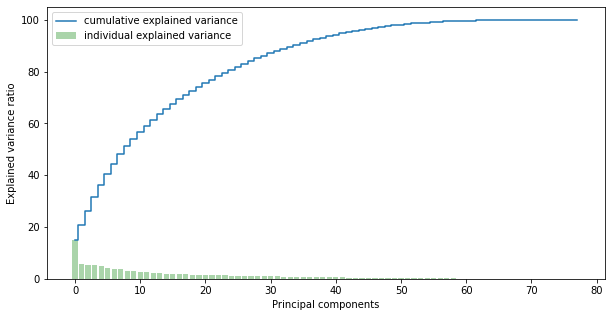

In [234]:
X_std = StandardScaler().fit_transform(df)
plot_explained_variance(X_std)

 We can see with some linear combinations between columns, we can get more than 90% of the info with 40 features and with 60 features we can get more than 98% of info which means that there is a lot of Correlation in our data and there is some features that hold near to 0% of data 

In [246]:
pca = PCA(n_components=60)

In [247]:
pca.fit(X_std)

PCA(n_components=60)

In [248]:
new_data=pca.transform(X_std)

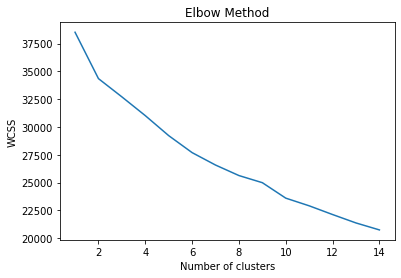

In [249]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

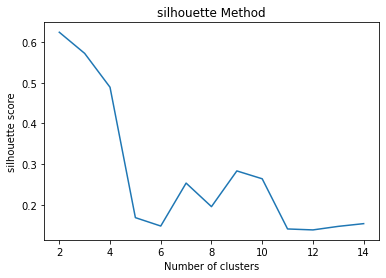

In [250]:
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    y = kmeans.predict(X_std)
    score = silhouette_score(X_std, y)
    silhouettes.append(score)
plt.plot(range(2, 15), silhouettes)
plt.title('silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

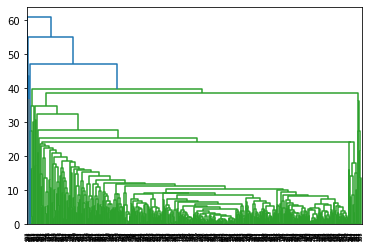

In [251]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_std, method='complete'))

In [267]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans.fit(X_std)
y_df = kmeans.predict(X_std)

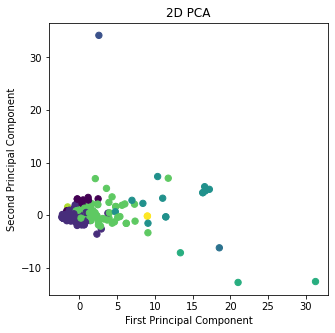

In [268]:
dim_reducer = PCA(n_components=2)
x_test_red = dim_reducer.fit_transform(X_std)
plt.figure(figsize=(5, 5))
plt.scatter(x_test_red[:,0],x_test_red[:,1],c=y_df.astype(float),s=40)
plt.title("2D PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

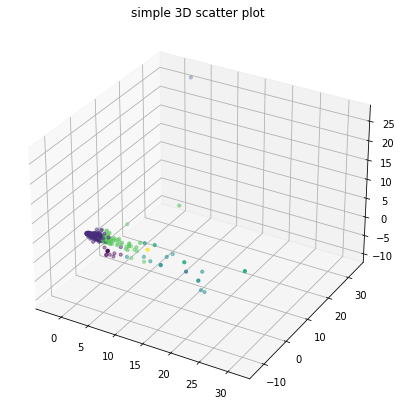

In [269]:
from mpl_toolkits import mplot3d
dim_reducer = PCA(n_components=3)
x_test_red = dim_reducer.fit_transform(X_std)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter(x_test_red[:,0],x_test_red[:,1],x_test_red[:,2],c=y_df.astype(float),s=10)
plt.title("simple 3D scatter plot")

plt.show()